In [3]:
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt 
import statsmodels
import gdown
import seaborn as sns
import tensorflow

In [47]:
df_cry = pd.read_pickle("hourly.pkl")

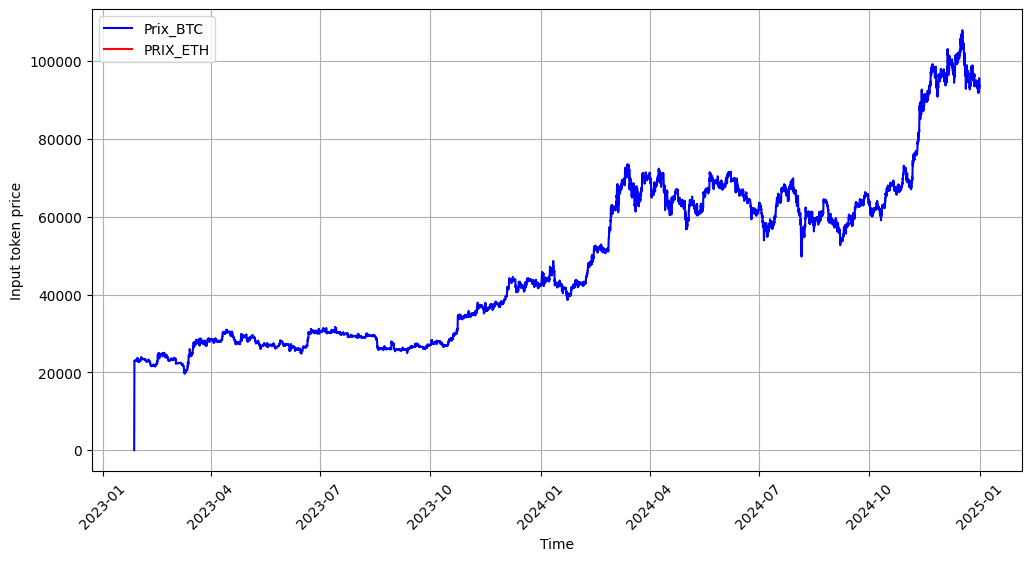

In [48]:
df_BTC=df_cry[df_cry['reserve_name']=='Wrapped BTC']
df_ETH=df_cry[df_cry['reserve_name']== 'Wrapped Ether']
plt.figure(figsize=(12, 6))
plt.plot(df_BTC["datetime"], df_BTC["inputTokenPriceUSD"],color="blue", label="Prix_BTC")
plt.plot(df_ETH["datetime"], df_ETH["inputTokenPriceUSD"], color="red", label="PRIX_ETH")
plt.title=('Evolution of the input token price')
plt.xlabel('Time')
plt.ylabel('Input token price')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [49]:
df_BTC.head()

,Unnamed: 0,blockNumber,timestamp_hours,id,inputTokenPriceUSD,outputTokenPriceUSD,snapshot_timestamp,reserve_name,protocol_name,protocol,datetime
91596,456,16496800,465223,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de84719...,0.000000,NaN,1674806207,Wrapped BTC,Aave v3,Aave,2023-01-27 07:00:00+00:00
91575,435,16498211,465228,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de84c19...,22901.415798,NaN,1674823235,Wrapped BTC,Aave v3,Aave,2023-01-27 12:00:00+00:00
91570,430,16498545,465229,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de84d19...,22889.291609,NaN,1674827267,Wrapped BTC,Aave v3,Aave,2023-01-27 13:00:00+00:00
91566,426,16498670,465230,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de84e19...,22840.819903,NaN,1674828779,Wrapped BTC,Aave v3,Aave,2023-01-27 14:00:00+00:00
91556,416,16499116,465231,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de84f19...,22979.545483,NaN,1674834143,Wrapped BTC,Aave v3,Aave,2023-01-27 15:00:00+00:00


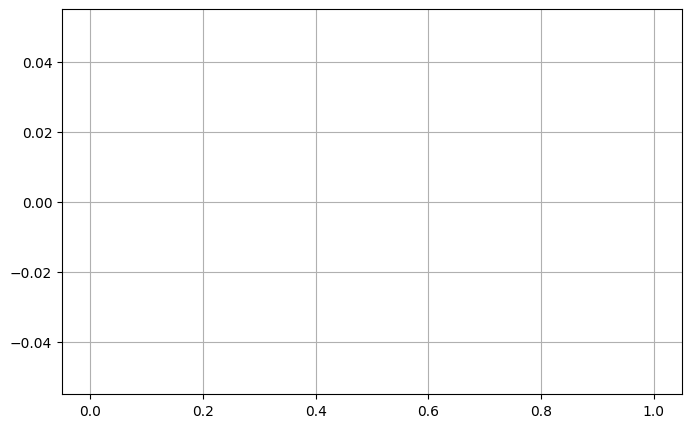

In [50]:
df_ETH['inputTokenPriceUSD'].hist(figsize=(8,5), bins=30)
plt.title=("Distribution des prix ETH")
plt.show()

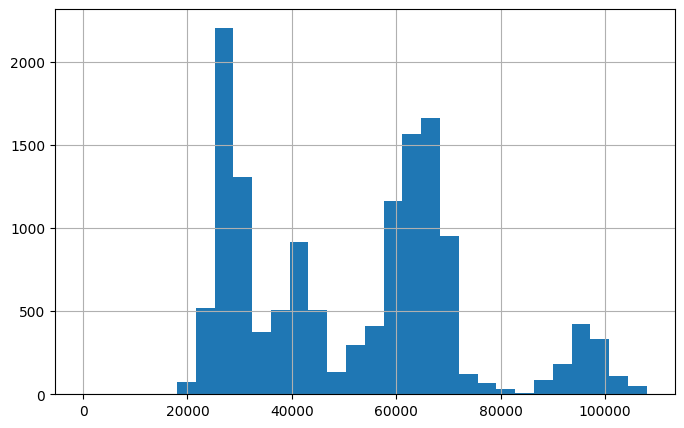

In [51]:
df_BTC['inputTokenPriceUSD'].hist(figsize=(8,5), bins=30)
plt.title=("Distribution des prix BTC")
plt.show()

**Les séries sont non stationnaires**

In [53]:
df= pd.read_pickle("reserve_features.pkl")
df.head()

,Unnamed: 0,regular_datetime,accruedToTreasury,availableLiquidity,averageStableBorrowRate,liquidityIndex,liquidityRate,priceInEth,priceInUsd,stableBorrowRate,...,totalLiquidity,totalPrincipalStableDebt,totalScaledVariableDebt,utilizationRate,variableBorrowIndex,variableBorrowRate,reserve_decimals,reserve_name,reserve_pool,true_value
277128,336,2023-01-27 08:00:00+00:00,1.055897e-07,3.001000,0.0,1.000014,0.000122,1.585870e+11,1.585870e+11,0.068676,...,3.042100,0.0,0.0411,0.013510,1.000017,0.010642,18.0,Wrapped Ether,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
277464,672,2023-01-27 08:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aave Token,NaN,0.0
277016,224,2023-01-27 08:00:00+00:00,0.000000e+00,0.180987,0.0,1.000000,0.000000,0.000000e+00,0.000000e+00,0.075000,...,0.180987,0.0,0.0000,0.000000,1.000000,0.002500,18.0,Wrapped liquid staked Ether 2.0,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
277240,448,2023-01-27 08:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ChainLink Token,NaN,0.0
276792,0,2023-01-27 08:00:00+00:00,0.000000e+00,0.584767,0.0,1.000000,0.000000,1.000158e+08,1.000158e+08,0.050000,...,1.584767,0.0,1.0000,0.631008,1.000000,0.000000,18.0,Dai Stablecoin,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0


In [54]:
res_BTC=df[df['reserve_name']=='Wrapped BTC']
pd.DataFrame(res_BTC)

,Unnamed: 0,regular_datetime,accruedToTreasury,availableLiquidity,averageStableBorrowRate,liquidityIndex,liquidityRate,priceInEth,priceInUsd,stableBorrowRate,...,totalLiquidity,totalPrincipalStableDebt,totalScaledVariableDebt,utilizationRate,variableBorrowIndex,variableBorrowRate,reserve_decimals,reserve_name,reserve_pool,true_value
277352,560,2023-01-27 08:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wrapped BTC,NaN,0.0
277353,561,2023-01-27 09:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wrapped BTC,NaN,0.0
277354,562,2023-01-27 10:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wrapped BTC,NaN,0.0
277355,563,2023-01-27 11:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wrapped BTC,NaN,0.0
277356,564,2023-01-27 12:00:00+00:00,0.000000,0.619864,0.0,1.000000,0.000000,0.0,0.0,0.09,...,0.619864,0.0,0.000000,0.000000,1.000000,0.000000,8.0,Wrapped BTC,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254467,3715,2024-12-31 19:00:00+00:00,0.036288,33788.341342,0.0,1.003206,0.000145,0.0,0.0,0.00,...,36511.314003,0.0,2730.518880,0.074579,1.021039,0.003809,8.0,Wrapped BTC,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
254468,3716,2024-12-31 20:00:00+00:00,0.036469,33774.009561,0.0,1.003206,0.000146,0.0,0.0,0.00,...,36508.195222,0.0,2741.500825,0.074892,1.021040,0.003825,8.0,Wrapped BTC,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
254469,3717,2024-12-31 21:00:00+00:00,0.037136,33746.943636,0.0,1.003206,0.000146,0.0,0.0,0.00,...,36499.301831,0.0,2759.298887,0.075409,1.021040,0.003823,8.0,Wrapped BTC,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
254470,3718,2024-12-31 22:00:00+00:00,0.038120,33746.963060,0.0,1.003206,0.000148,0.0,0.0,0.00,...,36499.321755,0.0,2759.299377,0.075408,1.021041,0.003851,8.0,Wrapped BTC,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0


In [55]:
df=pd.merge(df_BTC, res_BTC, left_on='datetime', right_on='regular_datetime')
cols = ['datetime'] + [col for col in df.columns if col != 'datetime']
df= df[cols]
pd.DataFrame(df)


,datetime,Unnamed: 0_x,blockNumber,timestamp_hours,id,inputTokenPriceUSD,outputTokenPriceUSD,snapshot_timestamp,reserve_name_x,protocol_name,...,totalLiquidity,totalPrincipalStableDebt,totalScaledVariableDebt,utilizationRate,variableBorrowIndex,variableBorrowRate,reserve_decimals,reserve_name_y,reserve_pool,true_value
0,2023-01-27 12:00:00+00:00,435,16498211,465228,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de84c19...,22901.415798,NaN,1674823235,Wrapped BTC,Aave v3,...,0.619864,0.0,0.000000,0.000000,1.000000,0.000000,8.0,Wrapped BTC,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
1,2023-01-27 13:00:00+00:00,430,16498545,465229,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de84d19...,22889.291609,NaN,1674827267,Wrapped BTC,Aave v3,...,0.768670,0.0,0.000000,0.000000,1.000000,0.000000,8.0,Wrapped BTC,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
2,2023-01-27 14:00:00+00:00,426,16498670,465230,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de84e19...,22840.819903,NaN,1674828779,Wrapped BTC,Aave v3,...,3.443268,0.0,0.000000,0.000000,1.000000,0.000000,8.0,Wrapped BTC,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
3,2023-01-27 15:00:00+00:00,416,16499116,465231,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de84f19...,22979.545483,NaN,1674834143,Wrapped BTC,Aave v3,...,5.263297,0.0,0.000000,0.000000,1.000000,0.000000,8.0,Wrapped BTC,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
4,2023-01-27 16:00:00+00:00,410,16499351,465232,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de85019...,23008.788367,NaN,1674836999,Wrapped BTC,Aave v3,...,5.318675,0.0,0.000000,0.000000,1.000000,0.000000,8.0,Wrapped BTC,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14018,2024-12-31 19:00:00+00:00,57,21524678,482131,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de8535b...,93759.525729,NaN,1735674995,Wrapped BTC,Aave v3,...,36511.314003,0.0,2730.518880,0.074579,1.021039,0.003809,8.0,Wrapped BTC,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
14019,2024-12-31 20:00:00+00:00,50,21524833,482132,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de8545b...,93759.525729,NaN,1735676855,Wrapped BTC,Aave v3,...,36508.195222,0.0,2741.500825,0.074892,1.021040,0.003825,8.0,Wrapped BTC,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
14020,2024-12-31 21:00:00+00:00,37,21525145,482133,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de8555b...,93271.901873,NaN,1735680623,Wrapped BTC,Aave v3,...,36499.301831,0.0,2759.298887,0.075409,1.021040,0.003823,8.0,Wrapped BTC,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
14021,2024-12-31 22:00:00+00:00,19,21525574,482134,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de8565b...,93512.722731,NaN,1735685771,Wrapped BTC,Aave v3,...,36499.321755,0.0,2759.299377,0.075408,1.021041,0.003851,8.0,Wrapped BTC,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0


In [56]:
missing_percentage = df.isnull().mean() * 100

# Créer un DataFrame avec toutes les informations pour une meilleure visibilité
missing_info = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': missing_percentage,
    'Filling Percentage': 100 - missing_percentage
})

missing_info_sorted = missing_percentage.sort_values(ascending=False)

print(missing_info_sorted)

outputTokenPriceUSD         100.0
datetime                      0.0
Unnamed: 0_x                  0.0
blockNumber                   0.0
id                            0.0
timestamp_hours               0.0
inputTokenPriceUSD            0.0
snapshot_timestamp            0.0
reserve_name_x                0.0
protocol_name                 0.0
protocol                      0.0
Unnamed: 0_y                  0.0
regular_datetime              0.0
accruedToTreasury             0.0
availableLiquidity            0.0
averageStableBorrowRate       0.0
liquidityIndex                0.0
liquidityRate                 0.0
priceInEth                    0.0
priceInUsd                    0.0
stableBorrowRate              0.0
timestamp                     0.0
totalATokenSupply             0.0
totalCurrentVariableDebt      0.0
totalLiquidity                0.0
totalPrincipalStableDebt      0.0
totalScaledVariableDebt       0.0
utilizationRate               0.0
variableBorrowIndex           0.0
variableBorrow

In [57]:
df=df.drop(['totalPrincipalStableDebt','outputTokenPriceUSD', 'Unnamed: 0_x', 'blockNumber', 'timestamp_hours', 'snapshot_timestamp', 
           'Unnamed: 0_y', 'totalPrincipalStableDebt', 'averageStableBorrowRate', 'priceInEth', 'priceInUsd', 'timestamp','reserve_decimals'
           ,'true_value'] , axis=1)

In [74]:
df_num= df.select_dtypes(include=['number'])
pd.DataFrame(df_num)

,inputTokenPriceUSD,accruedToTreasury,availableLiquidity,liquidityIndex,liquidityRate,stableBorrowRate,totalATokenSupply,totalCurrentVariableDebt,totalLiquidity,totalScaledVariableDebt,utilizationRate,variableBorrowIndex,variableBorrowRate
0,22901.415798,0.000000,0.619864,1.000000,0.000000,0.09,0.619864,0.000000,0.619864,0.000000,0.000000,1.000000,0.000000
1,22889.291609,0.000000,0.768670,1.000000,0.000000,0.09,0.768670,0.000000,0.768670,0.000000,0.000000,1.000000,0.000000
2,22840.819903,0.000000,3.443268,1.000000,0.000000,0.09,3.443268,0.000000,3.443268,0.000000,0.000000,1.000000,0.000000
3,22979.545483,0.000000,5.263297,1.000000,0.000000,0.09,5.263297,0.000000,5.263297,0.000000,0.000000,1.000000,0.000000
4,23008.788367,0.000000,5.318675,1.000000,0.000000,0.09,5.318675,0.000000,5.318675,0.000000,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14018,93759.525729,0.036288,33788.341342,1.003206,0.000145,0.00,36595.717590,2787.966074,36511.314003,2730.518880,0.074579,1.021039,0.003809
14019,93759.525729,0.036469,33774.009561,1.003206,0.000146,0.00,36592.599123,2799.180682,36508.195222,2741.500825,0.074892,1.021040,0.003825
14020,93271.901873,0.037136,33746.943636,1.003206,0.000146,0.00,36583.706269,2817.354629,36499.301831,2759.298887,0.075409,1.021040,0.003823
14021,93512.722731,0.038120,33746.963060,1.003206,0.000148,0.00,36583.727180,2817.356429,36499.321755,2759.299377,0.075408,1.021041,0.003851


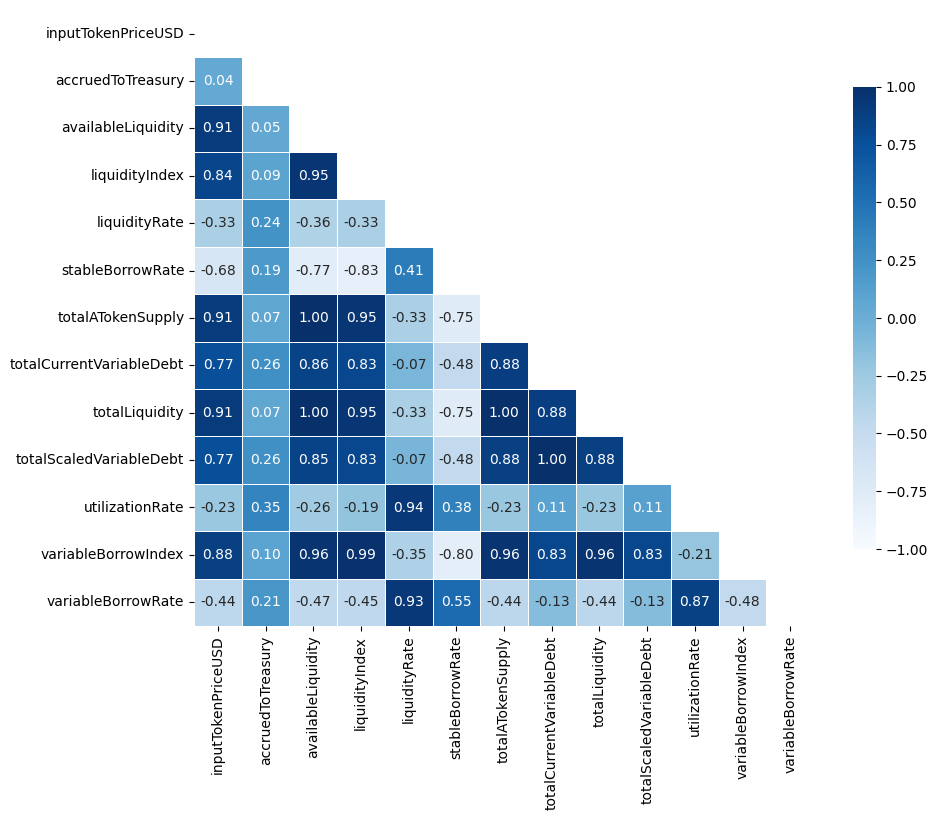

In [75]:
corr_matrix=df_num.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1, cbar_kws={'shrink': 0.75})
plt.show()

In [76]:
print(df_num.columns)

Index(['inputTokenPriceUSD', 'accruedToTreasury', 'availableLiquidity',
       'liquidityIndex', 'liquidityRate', 'stableBorrowRate',
       'totalATokenSupply', 'totalCurrentVariableDebt', 'totalLiquidity',
       'totalScaledVariableDebt', 'utilizationRate', 'variableBorrowIndex',
       'variableBorrowRate'],
      dtype='object')


In [77]:
df_num['datetime']=df['datetime']
pd.DataFrame(df_num)

,inputTokenPriceUSD,accruedToTreasury,availableLiquidity,liquidityIndex,liquidityRate,stableBorrowRate,totalATokenSupply,totalCurrentVariableDebt,totalLiquidity,totalScaledVariableDebt,utilizationRate,variableBorrowIndex,variableBorrowRate,datetime
0,22901.415798,0.000000,0.619864,1.000000,0.000000,0.09,0.619864,0.000000,0.619864,0.000000,0.000000,1.000000,0.000000,2023-01-27 12:00:00+00:00
1,22889.291609,0.000000,0.768670,1.000000,0.000000,0.09,0.768670,0.000000,0.768670,0.000000,0.000000,1.000000,0.000000,2023-01-27 13:00:00+00:00
2,22840.819903,0.000000,3.443268,1.000000,0.000000,0.09,3.443268,0.000000,3.443268,0.000000,0.000000,1.000000,0.000000,2023-01-27 14:00:00+00:00
3,22979.545483,0.000000,5.263297,1.000000,0.000000,0.09,5.263297,0.000000,5.263297,0.000000,0.000000,1.000000,0.000000,2023-01-27 15:00:00+00:00
4,23008.788367,0.000000,5.318675,1.000000,0.000000,0.09,5.318675,0.000000,5.318675,0.000000,0.000000,1.000000,0.000000,2023-01-27 16:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14018,93759.525729,0.036288,33788.341342,1.003206,0.000145,0.00,36595.717590,2787.966074,36511.314003,2730.518880,0.074579,1.021039,0.003809,2024-12-31 19:00:00+00:00
14019,93759.525729,0.036469,33774.009561,1.003206,0.000146,0.00,36592.599123,2799.180682,36508.195222,2741.500825,0.074892,1.021040,0.003825,2024-12-31 20:00:00+00:00
14020,93271.901873,0.037136,33746.943636,1.003206,0.000146,0.00,36583.706269,2817.354629,36499.301831,2759.298887,0.075409,1.021040,0.003823,2024-12-31 21:00:00+00:00
14021,93512.722731,0.038120,33746.963060,1.003206,0.000148,0.00,36583.727180,2817.356429,36499.321755,2759.299377,0.075408,1.021041,0.003851,2024-12-31 22:00:00+00:00


In [91]:
data=df_num
pd.DataFrame(data)

,inputTokenPriceUSD,accruedToTreasury,availableLiquidity,liquidityIndex,liquidityRate,stableBorrowRate,totalATokenSupply,totalCurrentVariableDebt,totalLiquidity,totalScaledVariableDebt,utilizationRate,variableBorrowIndex,variableBorrowRate,datetime
0,22901.415798,0.000000,0.619864,1.000000,0.000000,0.09,0.619864,0.000000,0.619864,0.000000,0.000000,1.000000,0.000000,2023-01-27 12:00:00+00:00
1,22889.291609,0.000000,0.768670,1.000000,0.000000,0.09,0.768670,0.000000,0.768670,0.000000,0.000000,1.000000,0.000000,2023-01-27 13:00:00+00:00
2,22840.819903,0.000000,3.443268,1.000000,0.000000,0.09,3.443268,0.000000,3.443268,0.000000,0.000000,1.000000,0.000000,2023-01-27 14:00:00+00:00
3,22979.545483,0.000000,5.263297,1.000000,0.000000,0.09,5.263297,0.000000,5.263297,0.000000,0.000000,1.000000,0.000000,2023-01-27 15:00:00+00:00
4,23008.788367,0.000000,5.318675,1.000000,0.000000,0.09,5.318675,0.000000,5.318675,0.000000,0.000000,1.000000,0.000000,2023-01-27 16:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14018,93759.525729,0.036288,33788.341342,1.003206,0.000145,0.00,36595.717590,2787.966074,36511.314003,2730.518880,0.074579,1.021039,0.003809,2024-12-31 19:00:00+00:00
14019,93759.525729,0.036469,33774.009561,1.003206,0.000146,0.00,36592.599123,2799.180682,36508.195222,2741.500825,0.074892,1.021040,0.003825,2024-12-31 20:00:00+00:00
14020,93271.901873,0.037136,33746.943636,1.003206,0.000146,0.00,36583.706269,2817.354629,36499.301831,2759.298887,0.075409,1.021040,0.003823,2024-12-31 21:00:00+00:00
14021,93512.722731,0.038120,33746.963060,1.003206,0.000148,0.00,36583.727180,2817.356429,36499.321755,2759.299377,0.075408,1.021041,0.003851,2024-12-31 22:00:00+00:00


In [92]:
data=data[['datetime', 'inputTokenPriceUSD']]

In [93]:
data['datetime'] = pd.to_datetime(data['datetime'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_22100\2412623082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['datetime'] = pd.to_datetime(data['datetime'])


In [94]:
data = data.groupby(data['datetime'].dt.date)['inputTokenPriceUSD'].mean().reset_index()
data.columns = ['datetime', 'mean_price']
data.head()

,datetime,mean_price
0,2023-01-27,22961.478973
1,2023-01-28,22974.565557
2,2023-01-29,23329.118956
3,2023-01-30,23165.014151
4,2023-01-31,22920.657181


In [98]:
data['datetime'] = data['datetime'].astype(str)

In [99]:
import datetime
def str_to_datetime(s):
    split=s.split('-')
    year, month, day= int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

data['datetime']= data['datetime'].apply(str_to_datetime)

    

In [100]:
data.index=data.pop('datetime')

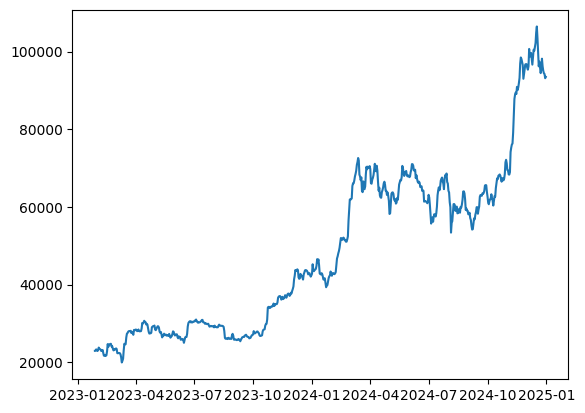

In [101]:
plt.plot(data.index, data['mean_price'])

In [104]:
data.head()

,mean_price
datetime,
2023-01-27,22961.478973
2023-01-28,22974.565557
2023-01-29,23329.118956
2023-01-30,23165.014151
2023-01-31,22920.657181


In [112]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['mean_price'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df
    
    
windowed_df = df_to_windowed_df(data, '2023-01-30', '2024-12-31' )

In [113]:
pd.DataFrame(windowed_df)

,Target Date,Target-3,Target-2,Target-1,Target
0,2023-01-30,22961.478973,22974.565557,23329.118956,23165.014151
1,2023-01-31,22974.565557,23329.118956,23165.014151,22920.657181
2,2023-02-01,23329.118956,23165.014151,22920.657181,23130.657942
3,2023-02-02,23165.014151,22920.657181,23130.657942,23797.015096
4,2023-02-03,22920.657181,23130.657942,23797.015096,23490.426089
...,...,...,...,...,...
697,2024-12-27,95605.110393,98188.716628,96240.516288,95112.277287
698,2024-12-28,98188.716628,96240.516288,95112.277287,94435.299174
699,2024-12-29,96240.516288,95112.277287,94435.299174,94256.891297
700,2024-12-30,95112.277287,94435.299174,94256.891297,93161.837697


In [114]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((702,), (702, 3, 1), (702,))

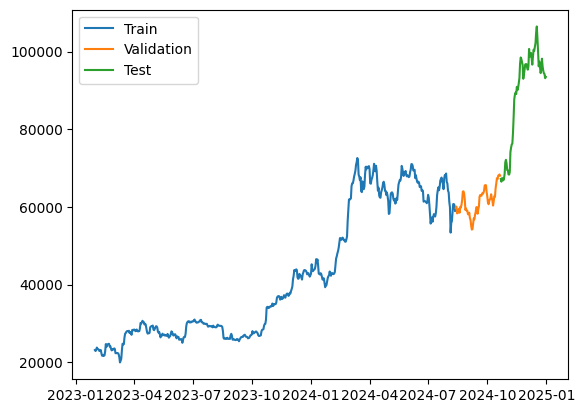

In [115]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [143]:
import tensorflow as tf
from tensorflow.keras import layers

ModuleNotFoundError: No module named 'tensorflow.keras'

In [134]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

ModuleNotFoundError: No module named 'tensorflow.keras'

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])